# HW 2

Eric Liu, Austin Du, Eric Wang

This file contains all the R code used to analyze our data and to generate graphs/tables

#### Installs/Imports

In [1]:
# install.packages("ggplot2")
library("ggplot2")



#### Load Data

In [2]:
demographics = read.table("./videodata.txt", sep="", header=T, stringsAsFactors=FALSE)
head(demographics)

,time,like,where,freq,busy,educ,sex,age,home,math,work,own,cdrom,email,grade
,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2.0,3,3,2,0,1,0,19,1,0,10,1,0,1,4
2,0.0,3,3,3,0,0,0,18,1,1,0,1,1,1,2
3,0.0,3,1,3,0,0,1,19,1,0,0,1,0,1,3
4,0.5,3,3,3,0,1,0,19,1,0,0,1,0,1,3
5,0.0,3,3,4,0,1,0,19,1,1,0,0,0,1,3
6,0.0,3,2,4,0,0,1,19,0,0,12,0,0,0,3


In [3]:
likes_dislikes = read.table("./videoMultiple.txt", sep="", header=T)
likes_dislikes[is.na(likes_dislikes)] <- 0
head(likes_dislikes)

,action,adv,sim,sport,strategy,relax,coord,challenge,master,bored,⋯,graphic,time,frust,lonely,rules,cost,boring,friends,point,other2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0,0,0,0,1,1,0,1,1,0,⋯,0,1,0,0,0,1,0,0,1,
2,0,1,0,0,1,0,0,0,0,1,⋯,0,1,1,0,0,0,0,0,0,
3,1,0,0,1,1,1,0,0,0,0,⋯,0,0,0,0,0,1,0,0,0,
4,0,0,0,0,1,0,0,1,0,0,⋯,0,1,0,0,0,0,0,0,0,
5,0,0,0,0,1,1,0,1,1,0,⋯,0,0,0,0,1,1,0,0,0,
6,1,0,0,1,1,1,0,0,1,1,⋯,0,1,1,0,0,1,0,0,0,


#### Scenario 1: 
Begin by providing an estimate for the fraction of students who played a
video game in the week prior to the survey. Provide an interval estimate as well as a
point estimate for this proportion.

In [4]:
# find the proportion of people who played video games (time > 0), then compute the standard error
sample_proportion = mean(demographics$time > 0)
time_played = demographics$time
standard_error = sqrt(sample_proportion * (1 - sample_proportion) / length(time_played))
cat("standard error estimate:\t", standard_error, "\n")

# create the 95% interval estimate with the margin of error
margin_of_error = qnorm(.975) * standard_error
interval_estimate = c(sample_proportion - margin_of_error, sample_proportion + margin_of_error)
cat("95% interval estimate:\t\t", interval_estimate, "\n", sep = " ")

# point estimate
cat("point estimate:\t\t\t", sample_proportion)
margin_of_error

standard error estimate:	 0.05071247 


95% interval estimate:		 0.2742318 0.473021 


point estimate:			 0.3736264

[1] 0.09939462

#### Scenario 2: 
Check to see how the amount of time spent playing video games in the
week prior to the survey compares to the reported frequency of play (daily, weekly,
etc). How might the fact that there was an exam in the week prior to the survey affect
your previous estimates and this comparison?

In [5]:
# compute the mean and standard deviation of each category of frequency of play (1=daily, 2=weekly, 3=monthly, 4=semesterly)

# first select the relevant data
daily = demographics[demographics$freq == 1, c("time")]
weekly = demographics[demographics$freq == 2, c("time")]
monthly = demographics[demographics$freq == 3, c("time")]
semesterly = demographics[demographics$freq == 4, c("time")]

# compute the mean and std of each category and print it out
cat("category\t mean hours\t std hours\n")
cat("daily\t\t", mean(daily), "\t", sd(daily), "\n")
cat("weekly\t\t", mean(weekly), "\t", sd(weekly), "\n")
cat("monthly\t\t", mean(monthly), "\t", sd(monthly), "\n")
cat("semesterly\t", mean(semesterly), "\t", sd(semesterly), "\n")


category	 mean hours	 std hours


daily		 4.444444 	 5.570258 


weekly		 2.539286 	 5.499046 


monthly		 0.05555556 	 0.1616904 


semesterly	 0.04347826 	 0.2085144 


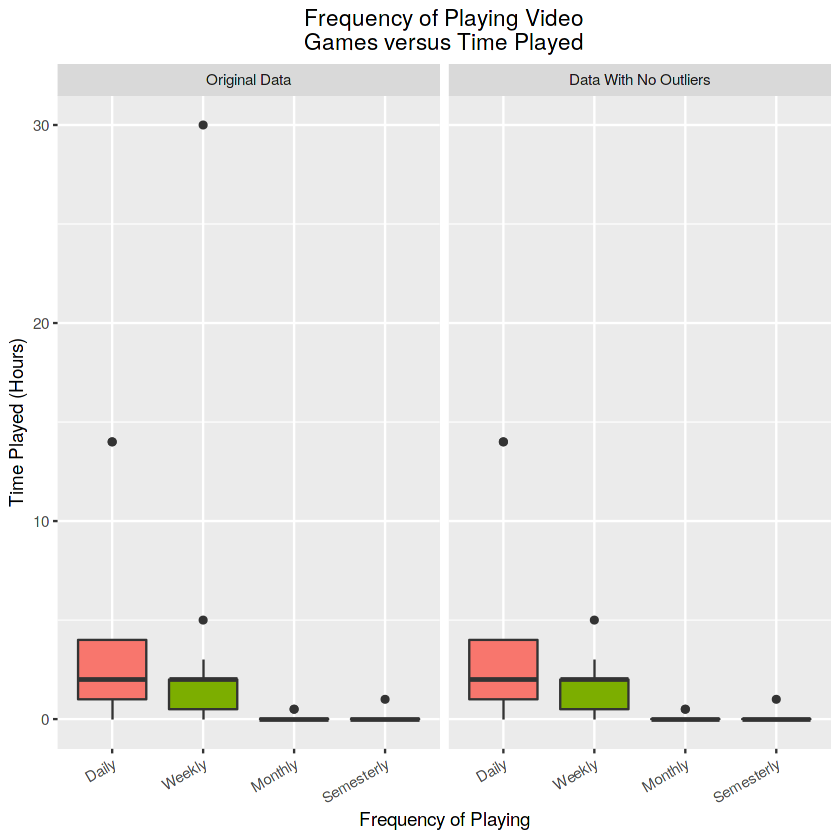

In [6]:
# new dataframe with only Time Played and Reported Frequency columns. Omit rows with 99.
no_missing_data = demographics[demographics$freq != 99, c("time", "freq")]
no_missing_data$category = "Original Data"

# remove outliers from the no missing data df
no_outliers = no_missing_data[no_missing_data$time != 30, c("time", "freq")]
no_outliers$category = "Data With No Outliers"

# recombine the two dfs, change some values to make more sense in the context of the graph
combined = rbind(no_missing_data, no_outliers)
combined$freq[combined$freq == 1] = "Daily"
combined$freq[combined$freq == 2] = "Weekly"
combined$freq[combined$freq == 3] = "Monthly"
combined$freq[combined$freq == 4] = "Semesterly"
combined$freq = factor(combined$freq, levels=c("Daily", "Weekly", "Monthly", "Semesterly"))
combined$freq = as.factor(combined$freq)
combined$category = factor(as.factor(combined$category), levels=c("Original Data", "Data With No Outliers"))

# create the side by side boxplots
ggplot(combined, aes(x=freq, y=time, fill=freq)) +
    geom_boxplot() +
    facet_wrap(~ category) +
    labs(x="Frequency of Playing", y="Time Played (Hours)", fill="Frequency of Playing") +
    ggtitle("Frequency of Playing Video\nGames versus Time Played") +
    theme(axis.text.x = element_text(angle=30, hjust=1), 
          plot.title = element_text(hjust=.5),
          legend.position= "none")

In [7]:
weekly_omitted = demographics[demographics$freq == 2 & demographics$time < 29, c("time")]
mean(weekly_omitted)
sd(weekly_omitted)

[1] 1.522222

[1] 1.151031

#### Scenario 3:  
Consider making an interval estimate for the average amount of time
spent playing video games in the week prior to the survey. Keep in mind the overall
shape of the sample distribution. A simulation study may help determine the
appropriateness of an interval estimate.

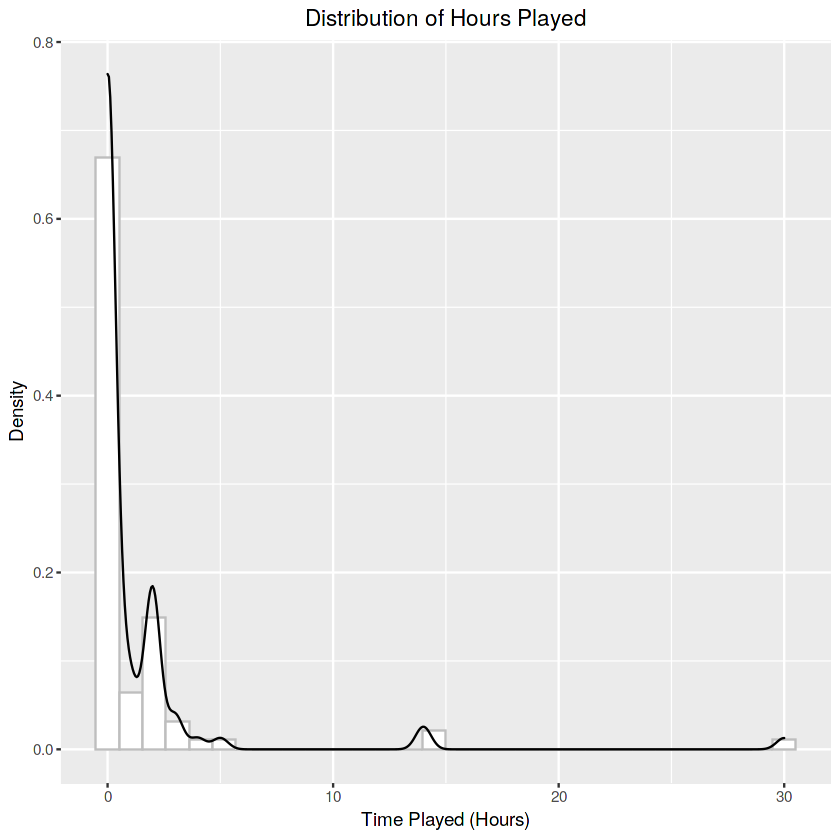

In [8]:
ggplot(demographics, aes(x=time)) +
    geom_histogram(bins=30, aes(y=..density..), color="grey", fill="white") +
    geom_density(aes(y=..density..)) +
    labs(x="Time Played (Hours)", y="Density") +
    ggtitle("Distribution of Hours Played") +
    theme(plot.title = element_text(hjust=.5))

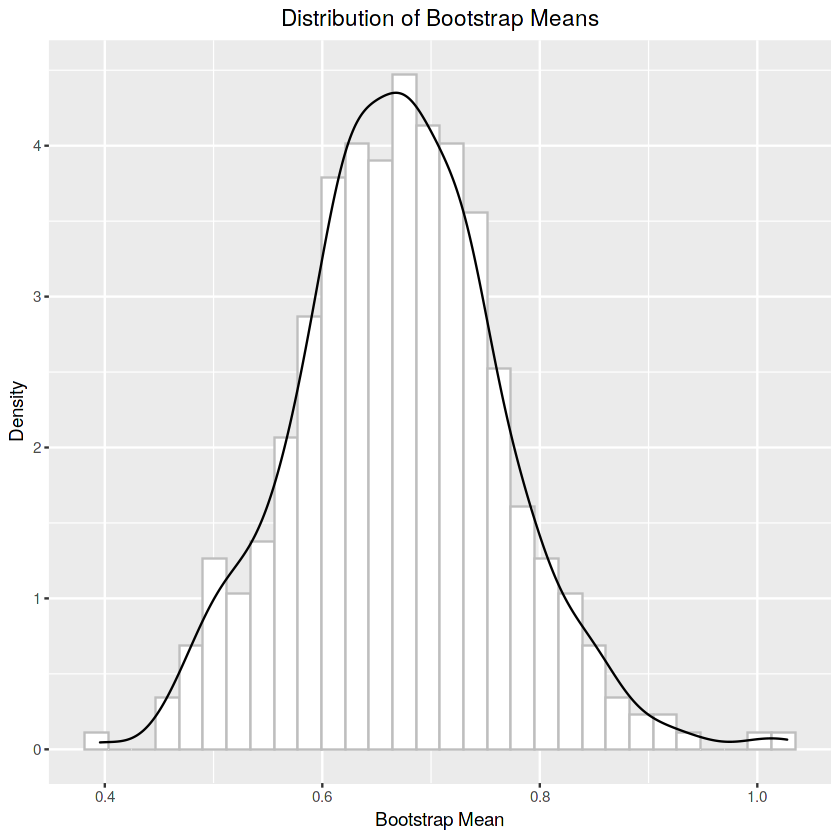

Warning message in ks.test((boot.mean - mean(boot.mean))/sd(boot.mean), pnorm):
“ties should not be present for the Kolmogorov-Smirnov test”


	One-sample Kolmogorov-Smirnov test

data:  (boot.mean - mean(boot.mean))/sd(boot.mean)
D = 0.038311, p-value = 0.6
alternative hypothesis: two-sided


[1] 1.060193 1.425521

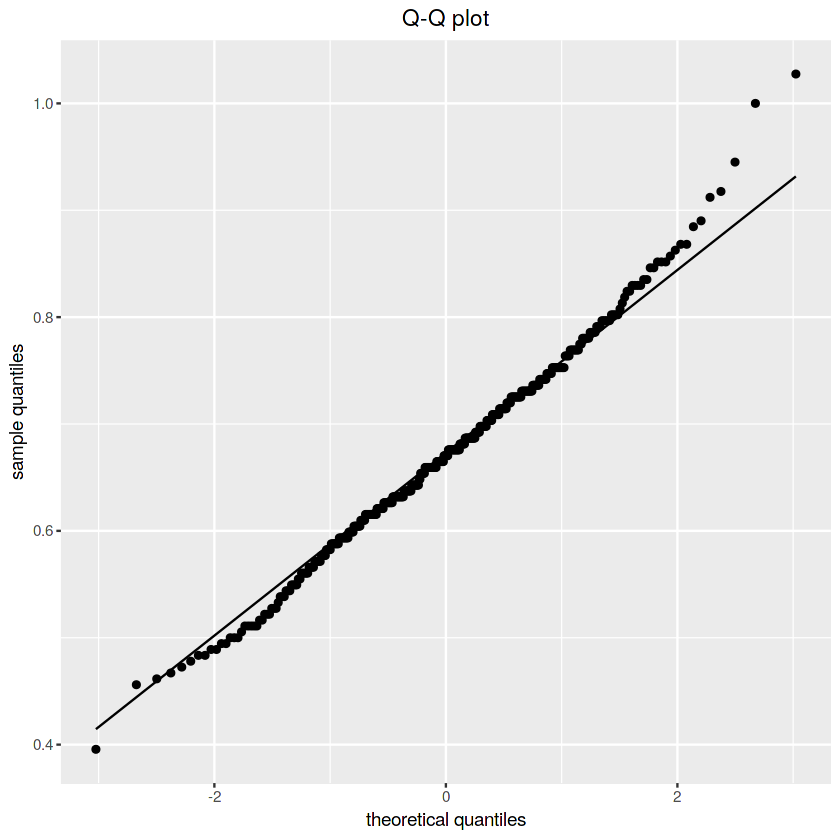

In [9]:
# simulation details
num_sims = 400
n = length(demographics$time)

# define sample
sample_mean = mean(demographics$time)
standard_dev = sd(demographics$time)

# set seed to reproduce study. Creates a bootstrap population to sample from.
set.seed(12345678)
shuffle.ind = sample(demographics$time)
boot.population <- rep(demographics$time[shuffle.ind], length.out = 314)

# Takes 400 samples from bootstrap population.
boot.sample <- array(dim = c(num_sims, length(demographics$time)))
for (i in 1:num_sims) {
  boot.sample[i, ] <- sample(boot.population, size = length(demographics$time), replace = FALSE)
}

# calculates mean of each sample
boot.mean <- apply(X = boot.sample, MARGIN = 1, FUN = mean)

# convert the means to a df
boot_df = data.frame(boot.mean)

# plot hist/density of sample means
ggplot(boot_df, aes(x=boot.mean)) +
    geom_histogram(bins=30, color="grey", fill="white", aes(y=..density..)) +
    geom_density(aes(y=..density..)) +
    labs(x="Bootstrap Mean", y="Density") +
    ggtitle("Distribution of Bootstrap Means") +
    theme(plot.title = element_text(hjust=.5))

# Check normality by qq plot and ks stat to determine validity of estimation interval.
# par(pty = 's')
# qqnorm(boot.mean)
# qqline(boot.mean)
ggplot(boot_df, aes(sample=boot.mean)) +
    stat_qq() +
    stat_qq_line() +
    labs(x="theoretical quantiles", y="sample quantiles") +
    ggtitle("Q-Q plot") +
    theme(plot.title = element_text(hjust=.5))
ks.test((boot.mean - mean(boot.mean))/sd(boot.mean), pnorm)

# Because distribution is proven to be relatively normal, we calculate 95% estimation interval.
boot.sd <- sd(boot.mean)
sample_mean + c(-1, 1)*1.96*boot.sd

#### Scenario 4:

 Next consider the ”attitude” questions. In general, do you think the
students enjoy playing video games? If you had to make a short list of the most
important reasons why students like/dislike video games, what would you put on the
list? Don’t forget that those students who say that they have never played video
games or do not at all like video games are asked to skip over some of these
questions. So, there may be many nonrespondents to the questions as to whether
they think video games are educational, where they play video games, etc.

In [10]:
# proportion of students who responded 'very much' or 'somewhat'
likes_videogames <- ifelse(demographics$like %in% c(2, 3), 1, 0)
cat("Proportion of students who 'like' videogames:\t\t", mean(likes_videogames), "\n")

# proportion of students who responded 'very much'
really_likes_games <- ifelse(demographics$like == 2, 1, 0)
cat("Proportion of students who 'really like' videogames:\t", mean(really_likes_games))

Proportion of students who 'like' videogames:		 0.7582418 


Proportion of students who 'really like' videogames:	 0.2527473

In [11]:
# classify the three questions asked in the survey into three dataframes
types_of_games = likes_dislikes[, c('action', 'adv', 'sim', 'sport', 'strategy')]
reason_for_playing = likes_dislikes[, c('relax', 'coord', 'challenge', 'master', 'bored', 'other')]
reason_for_not_playing = likes_dislikes[, c('time', 'frust', 'lonely', 'rules', 'cost', 'boring', 'friends', 'point', 'other2')]

# find the proportion of students who chose each reason for liking/disliking videogames
likes_props = sapply(subset(reason_for_playing, select = -c(other)), mean, na.rm = TRUE)
dislikes_props = sapply(subset(reason_for_not_playing, select = -c(other2)), mean, na.rm = TRUE)

# find distribution of likes/dislikes after removing those who voted for the top answers (relaxation for likes, time for dislikes)
secondary_likes = reason_for_playing[reason_for_playing$relax == 0,]
secondary_dislikes = reason_for_not_playing[reason_for_not_playing$time == 0,]

secondary_likes_props = sapply(subset(secondary_likes, select = -c(other)), mean, na.rm = TRUE)
secondary_dislikes_props = sapply(subset(secondary_dislikes, select = -c(other2)), mean, na.rm = TRUE)

#combine initial proportions and proportions with most popular choice removed into dataframes
data.frame(round(likes_props, 3), round(secondary_likes_props, 3))
data.frame(round(dislikes_props, 3), round(secondary_dislikes_props, 3))



,round.likes_props..3.,round.secondary_likes_props..3.
,<dbl>,<dbl>
relax,0.637,0.000
coord,0.044,0.000
challenge,0.231,0.121
master,0.275,0.212
bored,0.264,0.212


,round.dislikes_props..3.,round.secondary_dislikes_props..3.
,<dbl>,<dbl>
time,0.462,0.000
frust,0.253,0.245
lonely,0.044,0.061
rules,0.187,0.286
cost,0.385,0.367
boring,0.154,0.184
friends,0.022,0.041
point,0.319,0.347


#### Scenario 5:
 Look for the differences between those who like to play video games and
those who don’t. To do this, use the questions in the last part of the survey, and make
comparisons between male and female students, those who work for pay and those
who don’t, those who own a computer and those who don’t. Graphical display and
cross-tabulations are particularly helpful in making these kinds of comparisons. Also,
you may want to collapse the range of responses to a question down to two or three
possibilities before making these comparisons.



In [12]:
# extract relevant information
gamers = demographics[, c('like', 'sex', 'work', 'own')]

# combine into contingency tables for sex of student, whether student works for pay, and whether student owns PC
sex = table(gamers$like, gamers$sex)
rownames(sex) = c('Never Played', 'Very Much', 'Somewhat', 'Not Really', 'Not at all', "No answer")
colnames(sex) = c('Female', 'Male')
# sex

gamers$work[gamers$work > 0 & gamers$work <= 10] <- 1
gamers$work[gamers$work > 10] <- 2
works_for_pay = table(gamers$like, gamers$work)
rownames(works_for_pay) = c('Never Played', 'Very Much', 'Somewhat', 'Not Really', 'Not at all', "No answer")
colnames(works_for_pay) = c("Doesn't work", "Works <10 hrs", "Works >10 hrs")
# works_for_pay

owns_PC = table(gamers$like, gamers$own)
rownames(owns_PC) = c('Never Played', 'Very Much', 'Somewhat', 'Not Really', 'Not at all', "No answer")
colnames(owns_PC) = c('Owns PC', "Doesn't own PC")
# owns_PC


# combine tables
comparisons = cbind(sex, works_for_pay, owns_PC)[c(2, 3, 4, 5, 1, 6),]
comparisons

,Female,Male,Doesn't work,Works <10 hrs,Works >10 hrs,Owns PC,Doesn't own PC
Very Much,5,18,9,6,8,5,18
Somewhat,21,25,21,9,16,16,30
Not Really,8,5,10,3,0,1,12
Not at all,4,3,4,0,3,2,5
Never Played,0,1,0,1,0,0,1
No answer,0,1,0,0,1,0,1


<table>
    <tr>
        <td>Foo</td>
        <td>Foo</td>
    </tr>
</table>

In [13]:
# Perform X-squared tests with the three contingency tables to check for independence

cat("Results for Likes_Videogames vs. Student_Sex:")
chisq.test(sex[-6,], simulate.p.value = TRUE, B = 100000)

cat("\n\n\nResults for Likes_Videogames vs. Student_Works_for_Pay:")
chisq.test(works_for_pay[-6,], simulate.p.value = TRUE, B = 100000)

cat("\n\n\nResults for Likes_Videogames vs. Student_Owns_PC:")
chisq.test(owns_PC[-6,], simulate.p.value = TRUE, B = 100000)

Results for Likes_Videogames vs. Student_Sex:


	Pearson's Chi-squared test with simulated p-value (based on 1e+05
	replicates)

data:  sex[-6, ]
X-squared = 7.5354, df = NA, p-value = 0.09294





Results for Likes_Videogames vs. Student_Works_for_Pay:


	Pearson's Chi-squared test with simulated p-value (based on 1e+05
	replicates)

data:  works_for_pay[-6, ]
X-squared = 13.106, df = NA, p-value = 0.08884





Results for Likes_Videogames vs. Student_Owns_PC:


	Pearson's Chi-squared test with simulated p-value (based on 1e+05
	replicates)

data:  owns_PC[-6, ]
X-squared = 4.605, df = NA, p-value = 0.3409
